In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from env_v1 import BlackjackEnv
from env_v2 import BlackjackDoubleDownEnv
from env_v3 import BlackjackDoubleDownSplitEnv

from q_learning import QLearning
from sarsa import Sarsa
from temporal_difference import TemporalDifference

plot_test_size = 10000

pygame 2.1.2 (SDL 2.0.16, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
qlearning1 = QLearning("v1", 0.2, gamma=0.15)
qlearning1.train(200000, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

qlearning2 = QLearning("v2", 0.2, gamma=0.15)
qlearning2.train(200000, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

qlearning3 = QLearning("v3", 0.2, gamma=0.15)
qlearning3.train(200000, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

training, episode 0 out of 200000
win: 0.382 | draw: 0.0515 | loss: 0.5665
mean reward: -0.1845
training, episode 10000 out of 200000
win: 0.4123 | draw: 0.0894 | loss: 0.4983
mean reward: -0.086
training, episode 20000 out of 200000
win: 0.4116 | draw: 0.0935 | loss: 0.4949
mean reward: -0.0833
training, episode 30000 out of 200000
win: 0.4178 | draw: 0.0914 | loss: 0.4908
mean reward: -0.073
training, episode 40000 out of 200000
win: 0.4232 | draw: 0.095 | loss: 0.4818
mean reward: -0.0586
training, episode 50000 out of 200000
win: 0.4141 | draw: 0.0967 | loss: 0.4892
mean reward: -0.0751
training, episode 60000 out of 200000
win: 0.4208 | draw: 0.0945 | loss: 0.4847
mean reward: -0.0639
training, episode 70000 out of 200000
win: 0.418 | draw: 0.0963 | loss: 0.4857
mean reward: -0.0677
training, episode 80000 out of 200000
win: 0.4088 | draw: 0.0967 | loss: 0.4945
mean reward: -0.0857
training, episode 90000 out of 200000
win: 0.4159 | draw: 0.0973 | loss: 0.4868
mean reward: -0.0709

In [3]:
sarsa1 = Sarsa("v1")
sarsa1.train(200000, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

sarsa2 = Sarsa("v2")
sarsa2.train(200000, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

sarsa3 = Sarsa("v3")
sarsa3.train(200000, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

training, episode 0 out of 200000
win: 0.3741 | draw: 0.0532 | loss: 0.5727
mean reward: -0.1986
training, episode 10000 out of 200000
win: 0.4068 | draw: 0.0859 | loss: 0.5073
mean reward: -0.1005
training, episode 20000 out of 200000
win: 0.413 | draw: 0.0897 | loss: 0.4973
mean reward: -0.0843
training, episode 30000 out of 200000
win: 0.423 | draw: 0.0877 | loss: 0.4893
mean reward: -0.0663
training, episode 40000 out of 200000
win: 0.4188 | draw: 0.0916 | loss: 0.4896
mean reward: -0.0708
training, episode 50000 out of 200000
win: 0.4152 | draw: 0.0916 | loss: 0.4932
mean reward: -0.078
training, episode 60000 out of 200000
win: 0.4255 | draw: 0.0863 | loss: 0.4882
mean reward: -0.0627
training, episode 70000 out of 200000
win: 0.4198 | draw: 0.0879 | loss: 0.4923
mean reward: -0.0725
training, episode 80000 out of 200000
win: 0.4154 | draw: 0.0913 | loss: 0.4933
mean reward: -0.0779
training, episode 90000 out of 200000
win: 0.4278 | draw: 0.0951 | loss: 0.4771
mean reward: -0.04

In [4]:
temporal_difference1 = TemporalDifference("v1")
temporal_difference1.train(200000, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

temporal_difference2 = TemporalDifference("v2")
temporal_difference2.train(200000, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

temporal_difference3 = TemporalDifference("v3")
temporal_difference3.train(200000, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

training, episode 0 out of 200000
win: 0.3813 | draw: 0.0502 | loss: 0.5685
mean reward: -0.1872
training, episode 10000 out of 200000
win: 0.4223 | draw: 0.0768 | loss: 0.5009
mean reward: -0.0786
training, episode 20000 out of 200000
win: 0.4212 | draw: 0.0851 | loss: 0.4937
mean reward: -0.0725
training, episode 30000 out of 200000
win: 0.424 | draw: 0.0912 | loss: 0.4848
mean reward: -0.0608
training, episode 40000 out of 200000
win: 0.4349 | draw: 0.0829 | loss: 0.4822
mean reward: -0.0473
training, episode 50000 out of 200000
win: 0.4277 | draw: 0.0905 | loss: 0.4818
mean reward: -0.0541
training, episode 60000 out of 200000
win: 0.4345 | draw: 0.0859 | loss: 0.4796
mean reward: -0.0451
training, episode 70000 out of 200000
win: 0.4226 | draw: 0.0886 | loss: 0.4888
mean reward: -0.0662
training, episode 80000 out of 200000
win: 0.4336 | draw: 0.0886 | loss: 0.4778
mean reward: -0.0442
training, episode 90000 out of 200000
win: 0.4244 | draw: 0.0872 | loss: 0.4884
mean reward: -0.

In [28]:
def compare_env(datas, value="reward", label=["Stick & Hit", "Stick, Hit & Double Down", "Stick, Hit, Double Down & Split"]):
    sns.set(rc={"figure.figsize":(10, 6)}) #width=3, #height=4
    for i, data in enumerate(datas):
        sns.lineplot(data=data, x="n", y=value, label=label[i])

In [37]:
def compare_algorithm(datas, value="reward", label=["Q-Learning", "Sarsa", "Temporal Difference"]):
    sns.set(rc={"figure.figsize":(10, 6)}) #width=3, #height=4
    for i, data in enumerate(datas):
        sns.lineplot(data=data, x="n", y=value, label=label[i])

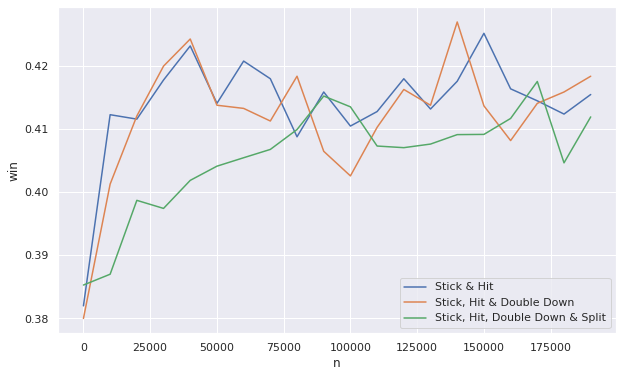

In [33]:
compare_env([qlearning1.plot, qlearning2.plot, qlearning3.plot], value="win")

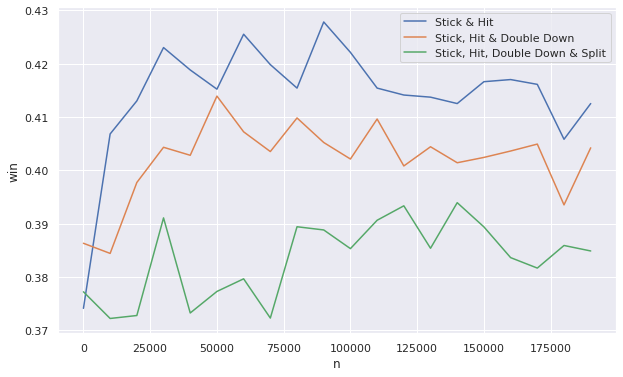

In [34]:
compare_env([sarsa1.plot, sarsa2.plot, sarsa3.plot], value="win")

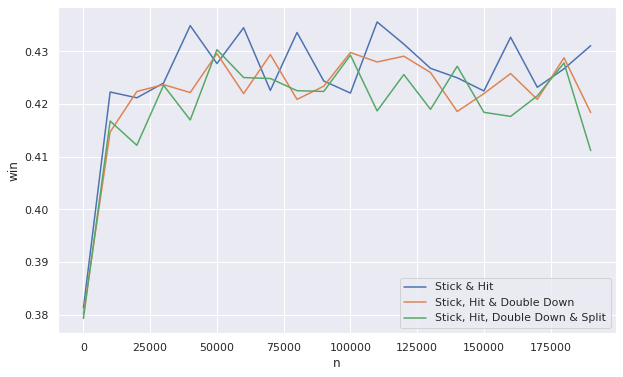

In [35]:
compare_env([temporal_difference1.plot, temporal_difference2.plot, temporal_difference3.plot], value="win")

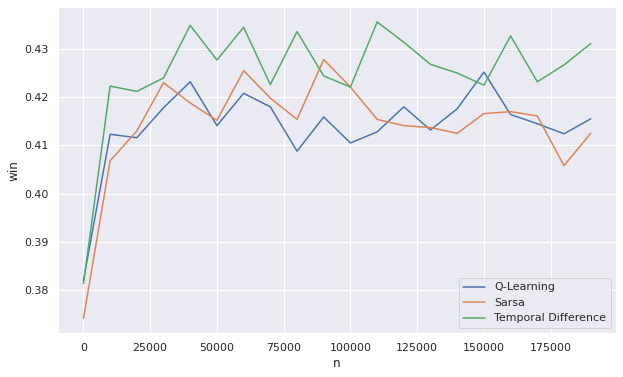

In [38]:
compare_algorithm([qlearning1.plot, sarsa1.plot, temporal_difference1.plot], value="win")

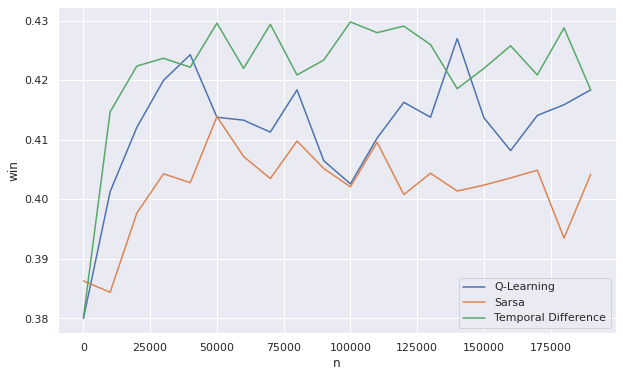

In [39]:
compare_algorithm([qlearning2.plot, sarsa2.plot, temporal_difference2.plot], value="win")

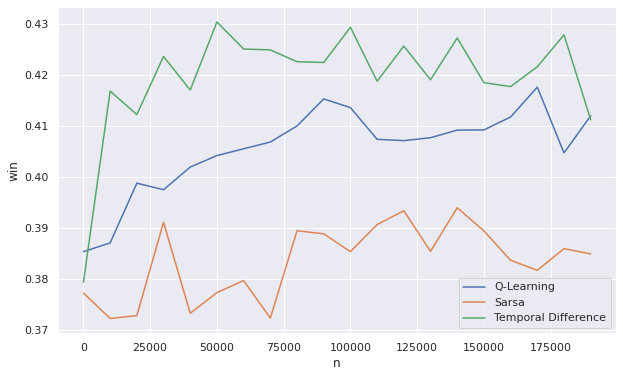

In [41]:
compare_algorithm([qlearning3.plot, sarsa3.plot, temporal_difference3.plot], value="win")